In [ ]:
import numpy as np
from tensorflow.keras.optimizers import Adam
#from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
import os

In [ ]:
IMG_SAVE_PATH = r'/content/drive/MyDrive/Split_smol/train'

In [ ]:
Str_to_Int = {
    'Actinic keratosis': 0,
    'Atopic Dermatitis': 1,
    'Benign keratosis': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevus': 4,
    'Melanoma':5,
    'Squamous cell carcinoma': 6,
    'Tinea Ringworm Candidiasis':7,
    'Vascular lesion': 8
}

NUM_CLASSES = 9


def str_to_Int_mapper(val):
    return Str_to_Int[val]

In [ ]:
import PIL
import cv2

dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        try:
            imgpath=PIL.Image.open(new_path)
            #if imgpath.shape!=(240,240,3):
            imgpath=imgpath.convert('RGB')
            img = np.asarray(imgpath)
            img = cv2.resize(img, (240,240))
            img=img/255.
            dataset.append([img, directory])
        except FileNotFoundError:
            print('Image file not found. Skipping...')

In [ ]:
data, labels = zip(*dataset)
temp = list(map(str_to_Int_mapper, labels))

In [ ]:
import keras
labels = keras.utils.to_categorical(temp)

In [ ]:
count=0
for i in data:
    if i.shape!=(240, 240, 3):
        count=count+1
print(count)

0


In [ ]:
def cnn():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(240, 240, 3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(9, activation='softmax'))

    return model


In [ ]:
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
model_cnn=cnn()
model_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']
)

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 118, 118, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 118, 118, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 114, 114, 128)     147584    
                                                        

In [ ]:
history_cnn=model_cnn.fit(np.array(data), np.array(labels), epochs = 20, batch_size=32, shuffle = True, validation_split = 0.2)

Epoch 1/20
18/18 [==============================] - 37s 1s/step - loss: 2.1664 - accuracy: 0.1337 - val_loss: 2.4455 - val_accuracy: 0.0000e+00
Epoch 2/20
18/18 [==============================] - 7s 401ms/step - loss: 2.0685 - accuracy: 0.1373 - val_loss: 2.4477 - val_accuracy: 0.0000e+00
Epoch 3/20
18/18 [==============================] - 7s 405ms/step - loss: 2.0553 - accuracy: 0.1729 - val_loss: 2.5569 - val_accuracy: 0.0000e+00
Epoch 4/20
18/18 [==============================] - 7s 416ms/step - loss: 1.9844 - accuracy: 0.2068 - val_loss: 2.6780 - val_accuracy: 0.0000e+00
Epoch 5/20
18/18 [==============================] - 8s 444ms/step - loss: 1.9071 - accuracy: 0.2692 - val_loss: 2.8212 - val_accuracy: 0.0000e+00
Epoch 6/20
18/18 [==============================] - 8s 423ms/step - loss: 1.7853 - accuracy: 0.3137 - val_loss: 3.1952 - val_accuracy: 0.0000e+00
Epoch 7/20
18/18 [==============================] - 8s 420ms/step - loss: 1.6980 - accuracy: 0.3868 - val_loss: 3.4806 - val_a

In [ ]:
print("Final Training Accuracy:", history_cnn.history['accuracy'][-1])
print("Final Validation Accuracy:", history_cnn.history['val_accuracy'][-1])

Final Training Accuracy: 0.7058823704719543
Final Validation Accuracy: 0.007092198356986046


In [ ]:
# save the model for later use
model_cnn.save("skin_disease_model_ISIC_densenet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
IMG_SAVE_PATH_TESTING = r'/content/drive/MyDrive/Split_smol/val'

In [ ]:
import PIL
import cv2
dataset_testing = []
for directory in os.listdir(IMG_SAVE_PATH_TESTING):
    path = os.path.join(IMG_SAVE_PATH_TESTING, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        imgpath=PIL.Image.open(new_path)
        #if imgpath.shape!=(240,240,3):
        imgpath=imgpath.convert('RGB')
        img = np.asarray(imgpath)
#         img = cv2.imread(new_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (240, 240))
        img=img/255.
        dataset_testing.append([img, directory])

In [ ]:
testing_data, testing_labels = zip(*dataset_testing)
testing_temp = list(map(str_to_Int_mapper, testing_labels))

In [ ]:
import keras
testing_labels = keras.utils.to_categorical(testing_temp)

In [ ]:
#Evaluating test accuracy
test_loss, test_accuracy = model_cnn.evaluate(np.array(testing_data), np.array(testing_labels))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 4s 720ms/step - loss: 1.6606 - accuracy: 0.5193
Test Loss: 1.6606066226959229
Test Accuracy: 0.519336998462677


In [ ]:
# Create a confusion matrix
!pip install scikit-plot
from sklearn.metrics import confusion_matrix
import scikitplot

# Make predictions
def make_preds(model):
    label_pred = model.predict(np.array(testing_data))

    def one_hot_highest(arr):
        for val in arr:
            max_val = max(val)
            for i in range(len(val)):
                if val[i] == max_val:
                    val[i] = 1
                else:
                    val[i] = 0
        return arr

    arr=one_hot_highest(label_preds)
    arr2= one_hot_highest(testing_labels)

    labelE=[]
    for i in range (0, len(arr)):
        flag=0
        for j in range (0,9):
            if arr[i][j]==1:
                labelE.append(j)
                flag=1
    labelEtest=[]
    for i in range (0, len(arr2)):
        for j in range (0,9):
            if arr2[i][j]==1:
                labelEtest.append(j)

    scikitplot.metrics.plot_confusion_matrix(labelEtest,labelE)

6/6 [==============================] - 1s 90ms/step


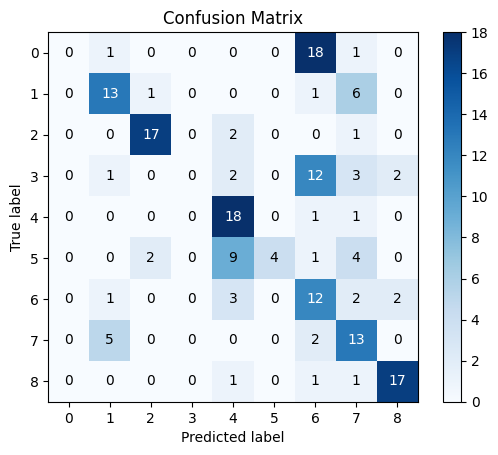

In [ ]:
make_preds(model_cnn)